Update intensity = updates per enrolment

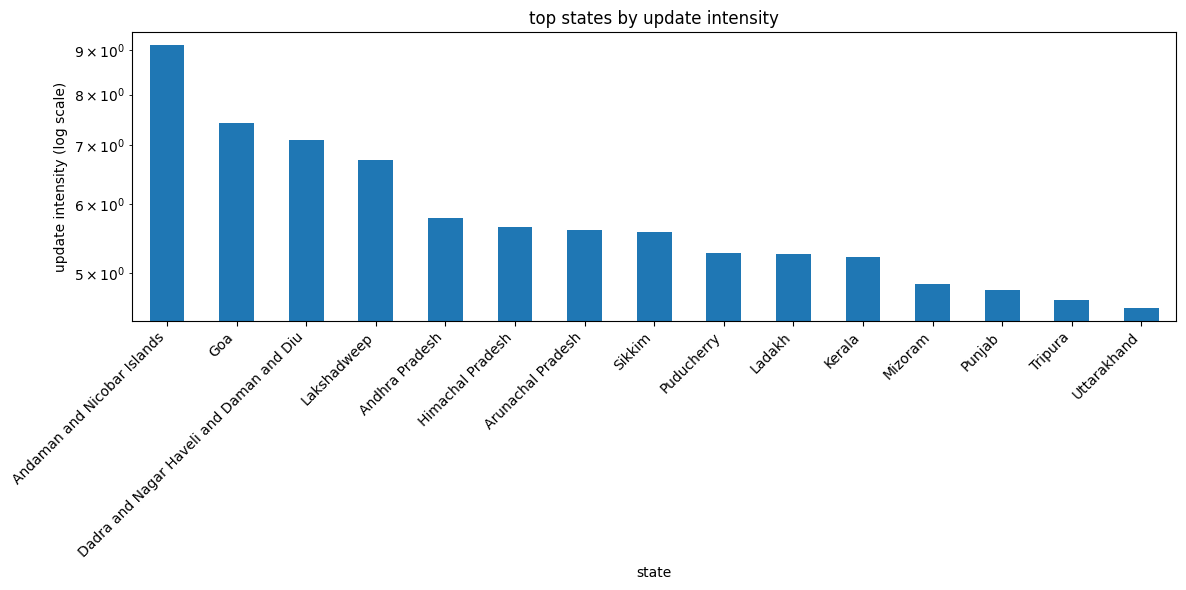

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
demographic_df=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
biometric_df=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

# aggregate
enrolments=enrolment_df.groupby("state").size()
updates=pd.concat([demographic_df,biometric_df]).groupby("state").size()

# compute intensity
intensity=(updates/enrolments).dropna()

# keep top 15 states
top_intensity=intensity.sort_values(ascending=False).head(15)

# plot
plt.figure(figsize=(12,6))
top_intensity.plot(kind="bar")

plt.yscale("log")
plt.xlabel("state")
plt.ylabel("update intensity (log scale)")
plt.title("top states by update intensity")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()
